<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 4: *Cart (Classification)***

###**Tenggat Waktu: 05 Oktober 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 05 Oktober 2024, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam. Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.



In [90]:
# Isi dengan data diri Anda
NAMA = "Irgi Muttaqin Fahrezi Situmorang"
KELAS = "C"
NPM = "2406385933"
USERNAME_KAGGLE = "irgimuttaqinfahrezi"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "Scikit-learn: Classification Metrics - https://scikit-learn.org/stable/modules/model_evaluation.html",
    "Scikit-learn: Confusion Matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html",
    "Scikit-learn: Random Forest Documentation - https://scikit-learn.org/stable/modules/ensemble.html#forest",
    "Scikit-learn: Decision Tree Classifier Documentation - https://scikit-learn.org/stable/modules/tree.html",
    "Scikit-learn: Regression Metrics - https://scikit-learn.org/stable/modules/model_evaluation.html",
    "Towards Data Science: Understanding RMSE and MAE in Regression Analysis - https://towardsdatascience.com/understanding-rmse-and-mae-in-regression-analysis-49bce3a7e3f",
    "Towards Data Science: Macro vs. Micro Averaging - https://towardsdatascience.com/macro-f1-and-micro-f1-score-58843f9e5d7b"
]

In [36]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Irgi Muttaqin Fahrezi Situmorang dari kelas C dengan NPM 2406385933, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Irgi Muttaqin Fahrezi Situmorang)


# Deskripsi Dataset

Dataset klasifikasi didapatkan dari : https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

Berikut merupakan penjelasan fitur dan target variabel :
- Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
- Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
- Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
- Precipitation (%) (numeric): The precipitation percentage, including outlier values.
- Cloud Cover (categorical): The cloud cover description.
- Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
- UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
- Season (categorical): The season during which the data was recorded.
- Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
- Location (categorical): The type of location where the data was recorded.
- Weather Type (categorical): The target variable for classification, indicating the weather type.

Dataset regresi didapatkan dari : https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

Berikut merupakan penjelasan fitur dan target variabel :
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

# Import Libraries

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns

# Read Dataset

In [38]:
df = pd.read_csv("weather_train.csv")
df

,ID,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,W9972,23.0,69,9.5,10.0,clear,1012.91,9,Spring,8.5,inland,Sunny
1,W501,29.0,82,18.0,78.0,overcast,991.54,3,Spring,4.0,inland,Rainy
2,W9187,-2.0,74,3.0,74.0,overcast,982.42,0,Winter,2.5,inland,Snowy
3,W6418,36.0,48,3.5,11.0,partly cloudy,1024.92,10,Autumn,5.5,mountain,Sunny
4,W5603,32.0,35,5.5,9.0,partly cloudy,1010.24,6,Summer,9.0,coastal,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
11215,W6427,75.0,70,35.5,99.0,overcast,1019.26,5,Spring,6.5,mountain,Cloudy
11216,W4741,44.0,53,8.5,18.0,clear,1023.11,5,Autumn,9.5,coastal,Sunny
11217,W6885,22.0,80,13.5,75.0,overcast,1019.13,0,Summer,2.5,mountain,Rainy
11218,W7829,33.0,52,9.5,34.0,overcast,1001.71,4,Autumn,7.0,inland,Cloudy


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11220 entries, 0 to 11219
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    11220 non-null  object 
 1   Temperature           11220 non-null  float64
 2   Humidity              11220 non-null  int64  
 3   Wind Speed            11220 non-null  float64
 4   Precipitation (%)     11220 non-null  float64
 5   Cloud Cover           11220 non-null  object 
 6   Atmospheric Pressure  11220 non-null  float64
 7   UV Index              11220 non-null  int64  
 8   Season                11220 non-null  object 
 9   Visibility (km)       11220 non-null  float64
 10  Location              11220 non-null  object 
 11  Weather Type          11220 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.0+ MB


In [40]:
df_r = pd.read_csv("Admission_Predict_Ver1.1.csv")
df_r

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [41]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Preprocessing

Sebenarnya decision tree dan random forest dapat menangani fitur kategorikal tetapi untuk implementasi yang ada pada library sklearn fitur-fitur kategorikal tersebut harus diubah terlebih dahulu menjadi angka. Oleh karena itu, preprocessing yang dilakukan adalah dengan meng-convert fitur kategorikal menjadi numerik.

In [42]:
le = LabelEncoder()

categorical_columns = ['Cloud Cover', 'Season', 'Location']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df

,ID,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,W9972,23.0,69,9.5,10.0,0,1012.91,9,1,8.5,1,Sunny
1,W501,29.0,82,18.0,78.0,2,991.54,3,1,4.0,1,Rainy
2,W9187,-2.0,74,3.0,74.0,2,982.42,0,3,2.5,1,Snowy
3,W6418,36.0,48,3.5,11.0,3,1024.92,10,0,5.5,2,Sunny
4,W5603,32.0,35,5.5,9.0,3,1010.24,6,2,9.0,0,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
11215,W6427,75.0,70,35.5,99.0,2,1019.26,5,1,6.5,2,Cloudy
11216,W4741,44.0,53,8.5,18.0,0,1023.11,5,0,9.5,0,Sunny
11217,W6885,22.0,80,13.5,75.0,2,1019.13,0,2,2.5,2,Rainy
11218,W7829,33.0,52,9.5,34.0,2,1001.71,4,0,7.0,1,Cloudy


# Split Dataset

In [43]:
df

,ID,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,W9972,23.0,69,9.5,10.0,0,1012.91,9,1,8.5,1,Sunny
1,W501,29.0,82,18.0,78.0,2,991.54,3,1,4.0,1,Rainy
2,W9187,-2.0,74,3.0,74.0,2,982.42,0,3,2.5,1,Snowy
3,W6418,36.0,48,3.5,11.0,3,1024.92,10,0,5.5,2,Sunny
4,W5603,32.0,35,5.5,9.0,3,1010.24,6,2,9.0,0,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
11215,W6427,75.0,70,35.5,99.0,2,1019.26,5,1,6.5,2,Cloudy
11216,W4741,44.0,53,8.5,18.0,0,1023.11,5,0,9.5,0,Sunny
11217,W6885,22.0,80,13.5,75.0,2,1019.13,0,2,2.5,2,Rainy
11218,W7829,33.0,52,9.5,34.0,2,1001.71,4,0,7.0,1,Cloudy


In [44]:
X = df.drop(columns=['Weather Type', 'ID'], axis=1)
y = df['Weather Type']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

In [46]:
df_r

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [47]:
X_r = df_r.drop(columns=['Chance of Admit '], axis=1)
y_r = df_r['Chance of Admit ']

In [48]:
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size = 0.8, random_state = 42)

# Metrics Evaluasi

Fungsi dibawah ini berguna untuk menghitung metrics yang dapat digunakan untuk mengukur kesesuaian model yang dibuat. Perlu diingat bahwa fungsi dibawah hanya dapat digunakan untuk model klasifikasi multi-class. PERLU DIINGAT FUNGSI INI DIGUNAKAN UNTUK KLASIFIKASI MULTI-CLASS BUKAN BINARY.

In [49]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))

Untuk dibawah merupakan fungsi yang dapat digunakan untuk menghitung metrics pada permasalahan regresi


In [50]:
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))

# Decision Tree (Classification)

Berikut merupakan cara membuat decision tree (classification) dengan menggunakan library sklearn. Contoh dibawah tidak menggunakan hyperparameter. Untuk mengetahui penjelasan hyperparameter, anda dapat mengunjungi laman ini : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# Evaluation Decision Tree (Classification)

## Training Dataset

In [52]:
dt_prediction_train = dt.predict(X_train)

classification_metrics(dt_prediction_train, y_train)

Accuracy: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0


## Testing Dataset

In [53]:
dt_prediction_test = dt.predict(X_test)

classification_metrics(dt_prediction_test, y_test)

Accuracy: 0.8978386809269162
F1 Score: 0.8977957184950156
Recall Score: 0.8978324332708972
Precision Score: 0.8983058721555406


# Random Forest (Classification)

Berikut merupakan cara membuat random forest (classification) dengan menggunakan library sklearn. Untuk contoh dibawah, tidak menggunakan hyperparameter. Untuk mengetahui penjelasan hyperparameter, anda dapat mengunjungi laman ini : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Evaluation Random Forest (Classification)

## Training Dataset

In [55]:
rf_prediction_train = rf.predict(X_train)

classification_metrics(rf_prediction_train, y_train)

Accuracy: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0


## Testing Dataset

In [56]:
rf_prediction_test = rf.predict(X_test)

classification_metrics(rf_prediction_test, y_test)

Accuracy: 0.9132130124777184
F1 Score: 0.9135925723485381
Recall Score: 0.9132910406713043
Precision Score: 0.9156044857180614


# Decision Tree (Regression)

In [57]:
dt_r = DecisionTreeRegressor()
dt_r.fit(X_r_train, y_r_train)

DecisionTreeRegressor()

# Evaluation Decision Tree (Regression)

## Training Dataset

In [58]:
dt_r_prediction_train = dt_r.predict(X_r_train)

regression_metrics(dt_r_prediction_train, y_r_train)

MAE: 0.0
MSE: 0.0
RMSE: 0.0


## Testing Dataset

In [59]:
dt_r_prediction_test = dt_r.predict(X_r_test)

regression_metrics(dt_r_prediction_test, y_r_test)

MAE: 0.05704999999999999
MSE: 0.0060515000000000005
RMSE: 0.07779138769812505


# Random Forest (Regression)

In [60]:
rf_r = DecisionTreeRegressor()
rf_r.fit(X_r_train, y_r_train)

DecisionTreeRegressor()

## Training Dataset

In [61]:
rf_r_prediction_train = rf_r.predict(X_r_train)

regression_metrics(rf_r_prediction_train, y_r_train)

MAE: 0.0
MSE: 0.0
RMSE: 0.0


## Testing Dataset

In [62]:
rf_r_prediction_test = rf_r.predict(X_r_test)

regression_metrics(rf_r_prediction_test, y_r_test)

MAE: 0.059000000000000004
MSE: 0.006706000000000001
RMSE: 0.08189017035029296


# Latihan Soal

## No. 1

**PERHATIAN UNTUK KODE DIBAWAH JANGAN DIUBAH**

In [63]:
# KODE INI JANGAN DIUBAH
df = pd.read_csv("weather_train.csv")
df
# KODE INI JANGAN DIUBAH

,ID,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,W9972,23.0,69,9.5,10.0,clear,1012.91,9,Spring,8.5,inland,Sunny
1,W501,29.0,82,18.0,78.0,overcast,991.54,3,Spring,4.0,inland,Rainy
2,W9187,-2.0,74,3.0,74.0,overcast,982.42,0,Winter,2.5,inland,Snowy
3,W6418,36.0,48,3.5,11.0,partly cloudy,1024.92,10,Autumn,5.5,mountain,Sunny
4,W5603,32.0,35,5.5,9.0,partly cloudy,1010.24,6,Summer,9.0,coastal,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
11215,W6427,75.0,70,35.5,99.0,overcast,1019.26,5,Spring,6.5,mountain,Cloudy
11216,W4741,44.0,53,8.5,18.0,clear,1023.11,5,Autumn,9.5,coastal,Sunny
11217,W6885,22.0,80,13.5,75.0,overcast,1019.13,0,Summer,2.5,mountain,Rainy
11218,W7829,33.0,52,9.5,34.0,overcast,1001.71,4,Autumn,7.0,inland,Cloudy


### **1.a Preprocessing**


Preprocessing dengan membuat kolum-kolum kategorikal menjadi numerikal dengan ketentuan seperti berikut :

i. Cloud Cover
*   clear -> 0
*   partly cloudy -> 1
*   cloudy -> 2
*   overcast -> 3

ii. Season
*   Winter -> 0
*   Spring -> 1
*   Summer -> 2
*   Autumn -> 3

iii. Location
*   coastal -> 0
*   inland -> 1
*   mountain -> 2


In [64]:
# Jawab Disini
import pandas as pd

# Atur opsi Pandas untuk perilaku baru
pd.set_option('future.no_silent_downcasting', True)

# Baca data dari file CSV 
df = pd.read_csv("weather_train.csv")

# Pemetaan untuk label encoding
cloud_cover_mapping = {'clear': 0, 'partly cloudy': 1, 'cloudy': 2, 'overcast': 3}
season_mapping = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}
location_mapping = {'coastal': 0, 'inland': 1, 'mountain': 2}

# Buat salinan DataFrame
df_encoded = df.copy()

# Terapkan label encoding menggunakan metode replace()
df_encoded['Cloud Cover'] = df_encoded['Cloud Cover'].replace(cloud_cover_mapping)
df_encoded['Season'] = df_encoded['Season'].replace(season_mapping)
df_encoded['Location'] = df_encoded['Location'].replace(location_mapping)

# Konversi tipe data kolom secara eksplisit jika diperlukan
df_encoded['Cloud Cover'] = df_encoded['Cloud Cover'].astype('int64') 

# Tampilkan DataFrame yang sudah di-preprocessing
print(df_encoded.head().to_markdown(index=False, numalign="left", stralign="left"))

| ID    | Temperature   | Humidity   | Wind Speed   | Precipitation (%)   | Cloud Cover   | Atmospheric Pressure   | UV Index   | Season   | Visibility (km)   | Location   | Weather Type   |
|:------|:--------------|:-----------|:-------------|:--------------------|:--------------|:-----------------------|:-----------|:---------|:------------------|:-----------|:---------------|
| W9972 | 23            | 69         | 9.5          | 10                  | 0             | 1012.91                | 9          | 1        | 8.5               | 1          | Sunny          |
| W501  | 29            | 82         | 18           | 78                  | 3             | 991.54                 | 3          | 1        | 4                 | 1          | Rainy          |
| W9187 | -2            | 74         | 3            | 74                  | 3             | 982.42                 | 0          | 0        | 2.5               | 1          | Snowy          |
| W6418 | 36            | 48         | 3.5   

### **1.b Split dataset**

Ketentuan:
*   data target : Weather Type
*   random state : 2024
*   split dengan data testing sebanyak 30%



In [65]:
    # Jawab disini
    # Split X dan y disini
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns=['Weather Type', 'ID'], axis=1)  # Semua kolom kecuali 'Weather Type' dan 'ID' adalah fitur
y = df_encoded['Weather Type']  # Kolom 'Weather Type' adalah target



In [66]:
# Jawab disini
# Split train dan test disini
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

## No. 2

### **2.a Buatlah model decision tree dan random forest**

Dengan ketentuan seperti berikut :

Decision Tree
*   max_depth = 3
*   random_state = 2024

Random Forest :      
*   max_depth = 3
*   n_estimators = 50
*   random_state = 2024

In [67]:
# Jawab Disini
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=2024)

# Latih model Decision Tree pada data latih
dt.fit(X_train, y_train)

# Inisialisasi model Random Forest
rf = RandomForestClassifier(max_depth=3, n_estimators=50, random_state=2024)

# Latih model Random Forest pada data latih
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=2024)

### **2.b Jelaskan fungsi dan dampak menambahkan atau mengurangi hyperparameter max_depths dan n_estimators (Sertakan sumber anda)**  

**Jawab Disini**
### Penjelasan Hyperparameter

#### `max_depth`
- **Fungsi** mengontrol seberapa dalam model keputusan (atau setiap model dalam Random Forest) dapat tumbuh
- **Nilai Kecil** model lebih sederhana dan mudah diinterpretasi tapi bisa gagal menangkap pola kompleks
- **Nilai Besar** model lebih kompleks dan mampu menangkap pola lebih rumit namun berisiko overfitting (terlalu sesuai dengan data latih)

#### `n_estimators` (khusus Random Forest)
- **Fungsi** menentukan jumlah model keputusan yang akan dibangun
- **Nilai Kecil** pelatihan lebih cepat tapi akurasi mungkin kurang karena sedikit model yang berkontribusi
- **Nilai Besar** akurasi meningkat dengan lebih banyak model tapi pelatihan lebih lambat dan risiko overfitting jika model terlalu dalam

### Kesimpulan
- **max_depth** menyeimbangkan kompleksitas model dan kemampuan generalisasi
- **n_estimators** menyeimbangkan akurasi dan kecepatan pelatihan

#### Sumber
- [GeeksforGeeks: Effects of max_depth and n_estimators in Random Forest](https://www.geeksforgeeks.org/the-effects-of-the-depth-and-number-of-trees-in-a-random-forest/)
- [Medium: Parameter Tuning for Random Forest](https://towardsdatascience.com/in-depth-parameter-tuning-for-random-forest-d67bb7e920d)


## No. 3

### **3.a Prediksi dataset testing dengan menggunakan model decision tree dan random forest yang sudah dibuat**  

In [68]:
# Jawab disini
# Prediksi menggunakan model Decision Tree
dt_predictions = dt.predict(X_test)

# Prediksi menggunakan model Random Forest
rf_predictions = rf.predict(X_test)

### **3.b Perlihatkan metrik dari hasil prediksi model decision tree dan random forest menggunakan fungsi yang sudah di-define pada bagian sebelum soal**  

In [69]:
# Jawab disini
# Decision tree
# Evaluasi model Decision Tree pada data uji
print("Evaluasi Decision Tree pada Data Uji:")
classification_metrics(dt_predictions, y_test)

Evaluasi Decision Tree pada Data Uji:
Accuracy: 0.8707664884135472
F1 Score: 0.8718977765292001
Recall Score: 0.8705946077373137
Precision Score: 0.8755937073634319


In [70]:
# Jawab Disini
# Random Forest
# Evaluasi model Random Forest pada data uji
print("Evaluasi Random Forest pada Data Uji:")
classification_metrics(rf_predictions, y_test) 

Evaluasi Random Forest pada Data Uji:
Accuracy: 0.9046345811051694
F1 Score: 0.905213357291856
Recall Score: 0.9048158432119533
Precision Score: 0.9064719334825725


### **3.c Jelaskan apa artinya setiap metrik diatas dan kegunaannya (Sertakan sumber anda)**  

**Jawab Disini**
### Penjelasan Singkat Metrik Evaluasi Model

#### Accuracy (Akurasi)
- **Apa itu?** Akurasi adalah seberapa sering model memberikan prediksi yang benar dari keseluruhan prediksi.
- **Kapan digunakan?** Ideal ketika dataset seimbang (jumlah kelas sama). Memberikan gambaran umum performa model.

#### Precision (Presisi)
- **Apa itu?** Presisi mengukur akurasi dari prediksi positif model. Berapa banyak prediksi positif yang benar?
- **Kapan digunakan?** Penting saat kesalahan positif mahal, seperti diagnosis medis. Lebih baik presisi tinggi untuk mengurangi prediksi positif yang salah.

#### Recall (Sensitivitas)
- **Apa itu?** Recall mengukur seberapa baik model menemukan semua kasus positif sebenarnya.
- **Kapan digunakan?** Berguna jika menghindari kesalahan negatif penting, misalnya untuk mendeteksi semua spam.

#### F1-Score
- **Apa itu?** Rata-rata harmonik antara precision dan recall. Memberikan keseimbangan keduanya.
- **Kapan digunakan?** Cocok saat dataset tidak seimbang atau saat precision dan recall sama-sama penting.

### Kesimpulan
Tidak ada metrik yang terbaik untuk semua situasi. Pilih metrik yang sesuai dengan tujuan spesifik model dan masalah yang dihadapi.

#### Sumber
- [Scikit-learn: Model Evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)


## No.4

### **4.a Buatlah confusion matrix untuk model decision tree dan random forest (Dataset test)**  

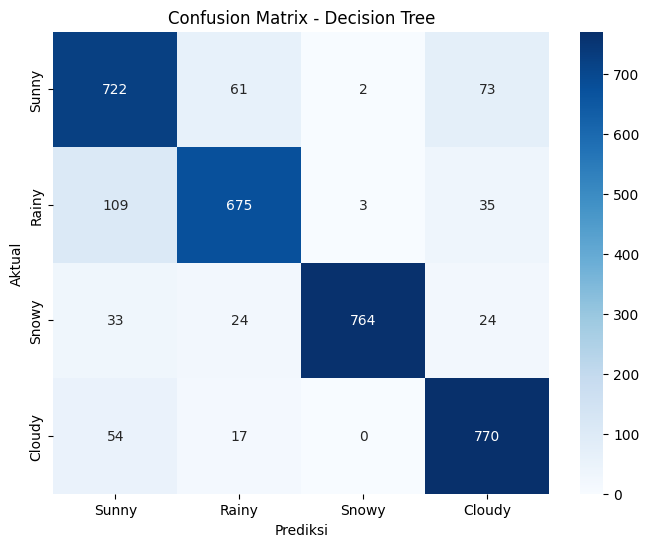

In [71]:
# Jawab disini
# Decision tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat confusion matrix untuk Decision Tree
dt_cm = confusion_matrix(y_test, dt_predictions)

# Tampilkan confusion matrix menggunakan heatmap dari seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=df['Weather Type'].unique(), 
            yticklabels=df['Weather Type'].unique())
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

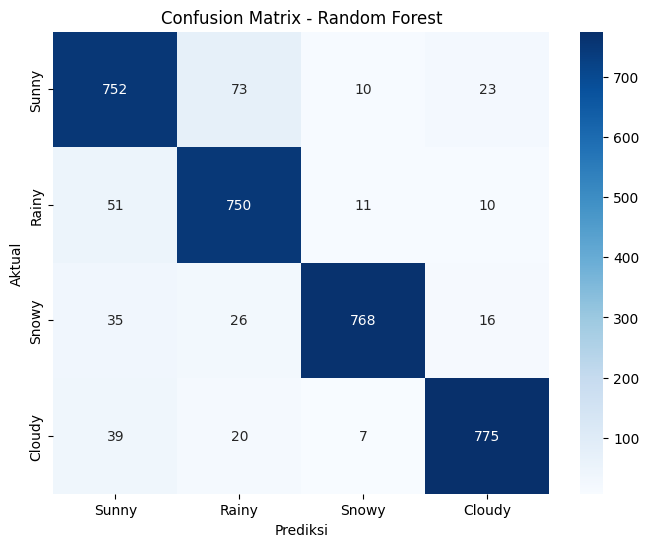

In [72]:
# Jawab disini
# Random forest
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat confusion matrix untuk Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)

# Tampilkan confusion matrix menggunakan heatmap dari seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=df['Weather Type'].unique(), 
            yticklabels=df['Weather Type'].unique())
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### **4.b Jelaskan bagaimana cara menghitung akurasi pada confusion matrix diatas untuk decision tree dan random forest, kalkulasi juga angkanya dan berikan juga formulanya (Sertakan sumber anda)**

**Jawab Disini**
#### **Confusion Matrix untuk Decision Tree:**

|             | Prediksi Kelas 0 | Prediksi Kelas 1 | Prediksi Kelas 2 | Prediksi Kelas 3 |
|-------------|------------------|------------------|------------------|------------------|
| **Aktual Kelas 0** | 722               | 61                | 2                 | 73               |
| **Aktual Kelas 1** | 109               | 675               | 3                 | 35               |
| **Aktual Kelas 2** | 33                | 24                | 764               | 24               |
| **Aktual Kelas 3** | 54                | 17                | 0                 | 770              |

- **True Positives (TP)** untuk semua kelas (nilai diagonal):
  \[
  TP = 722 + 675 + 764 + 770 = 2931
  \]
  
- **Total Data**: Jumlah seluruh elemen dalam confusion matrix:
  \[
  Total = 722 + 61 + 2 + 73 + 109 + 675 + 3 + 35 + 33 + 24 + 764 + 24 + 54 + 17 + 0 + 770 = 3366
  \]

#### **Akurasi untuk Decision Tree:**
Untuk **Decision Tree**, akurasi dihitung dengan membagi jumlah prediksi yang benar (True Positives) sebesar **2931** dengan total data sebanyak **3366**. Hasilnya adalah sekitar **0.8708 atau 87.08%.**

- **True Positives (TP)**: Jumlah prediksi yang benar untuk masing-masing kelas (nilai diagonal pada confusion matrix).
- **Total Data**: Jumlah seluruh elemen dalam confusion matrix (jumlah seluruh prediksi).

---

#### **Confusion Matrix untuk Random Forest:**

|             | Prediksi Kelas 0 | Prediksi Kelas 1 | Prediksi Kelas 2 | Prediksi Kelas 3 |
|-------------|------------------|------------------|------------------|------------------|
| **Aktual Kelas 0** | 752               | 73                | 10                | 23               |
| **Aktual Kelas 1** | 51                | 750               | 11                | 10               |
| **Aktual Kelas 2** | 35                | 26                | 768               | 16               |
| **Aktual Kelas 3** | 39                | 20                | 7                 | 775              |

- **True Positives (TP)** untuk semua kelas (nilai diagonal):
  \[
  TP = 752 + 750 + 768 + 775 = 3045
  \]

- **Total Data**: Jumlah seluruh elemen dalam confusion matrix:
  \[
  Total = 752 + 73 + 10 + 23 + 51 + 750 + 11 + 10 + 35 + 26 + 768 + 16 + 39 + 20 + 7 + 775 = 3366
  \]

#### **Akurasi untuk Random Forest:**
Untuk **Random Forest**, akurasi dihitung dengan membagi jumlah prediksi yang benar (True Positives) sebesar **3045** dengan total data sebanyak **3366**. Hasilnya adalah sekitar **0.9046 atau 90.46%.**

---

### **Kesimpulan:**
- **Decision Tree** memiliki akurasi sebesar **87.08%**.
- **Random Forest** memiliki akurasi lebih tinggi yaitu **90.46%**.

#### **Sumber Referensi:**
- [Scikit-learn: Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


## No. 5

### **5.a Buat sebuah dataframe baru yang memiliki kolom weather type**

Dengan ketentuan seperti berikut :
*   Rainy -> Not Sunny
*   Cloudy -> Not Sunny
*   Sunny -> Sunny
*   Snowy -> Not Sunny

In [73]:
# Contoh DataFrame yang sesuai
import pandas as pd

# Membuat DataFrame dengan kolom 'Weather Type'
data = {'Weather Type': ['Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Sunny', 'Rainy']}
df = pd.DataFrame(data)

# Membuat peta (mapping) untuk kategori weather
weather_mapping = {
    'Rainy': 'Not Sunny',
    'Cloudy': 'Not Sunny',
    'Sunny': 'Sunny',
    'Snowy': 'Not Sunny'
}

# Terapkan mapping ke kolom 'Weather Type' untuk membuat kolom baru
df['Weather Type Mapped'] = df['Weather Type'].map(weather_mapping)

# Tampilkan DataFrame baru untuk melihat hasilnya
df


,Weather Type,Weather Type Mapped
0,Sunny,Sunny
1,Rainy,Not Sunny
2,Cloudy,Not Sunny
3,Snowy,Not Sunny
4,Sunny,Sunny
5,Rainy,Not Sunny


###**5.b Split df tersebut menjadi test dan training**

Dengan ketentuan:     
*   random state = 4
*   split dengan data testing sebanyak 20%


In [74]:
# Jawab disini
# Split X dan y disini
from sklearn.model_selection import train_test_split

# Definisikan fitur (X) dan target (y)
X = df[['Weather Type Mapped']]  # Fitur (kolom baru 'Weather Type Mapped')
y = df['Weather Type']  # Target (kolom asli 'Weather Type')



In [75]:
# Jawab disini
# Split train dan test disini
# Split dataset menjadi training dan testing dengan test_size 20% dan random_state 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### **5.c Buatlah model random forest dan decision tree dari split df tersebut**
Dengan ketentuan:

Decision Tree :     
*   random_state = 2024

Random Forest :      
*   n_estimators = 150
*   random_state = 2024

In [76]:
# Jawab Disini
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Lakukan Label Encoding untuk kolom 'Weather Type Mapped' karena model membutuhkan input numerik
le = LabelEncoder()
X_train_encoded = le.fit_transform(X_train['Weather Type Mapped'])
X_test_encoded = le.transform(X_test['Weather Type Mapped'])

# Inisialisasi model Decision Tree dengan random_state = 2024
dt_model = DecisionTreeClassifier(random_state=2024)
dt_model.fit(X_train_encoded.reshape(-1, 1), y_train)

# Inisialisasi model Random Forest dengan n_estimators = 150 dan random_state = 2024
rf_model = RandomForestClassifier(n_estimators=150, random_state=2024)
rf_model.fit(X_train_encoded.reshape(-1, 1), y_train)

# Konfirmasi bahwa model berhasil dilatih
print("Model Decision Tree dan Random Forest berhasil dilatih.")


Model Decision Tree dan Random Forest berhasil dilatih.


### **5.d Prediksi dataset testing dengan menggunakan model decision tree dan random forest yang sudah dibuat dan perlihatkan metrik-metrik seperti accuracy, recall, F1 score, precision**

**PERHATIAN UNTUK TIDAK MENGGUNAKAN FUNGSI classification_metrics() KARENA METRIK TERSEBUT HANYA DAPAT DIGUNAKAN UNTUK MULTILABEL CLASSIFICATION SEDANGKAN CASE SAAT INI MERUPAKAN BINARY CLASSIFICATION, SEHINGGA BUAT SENDIRI KODE ANDA JANGAN MENGGUNAKAN FUNGSI TERSEBUT.**  

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Ulangi langkah encoding untuk X_test dan X_train
le = LabelEncoder()
X_train_encoded = le.fit_transform(X_train['Weather Type Mapped'])
X_test_encoded = le.transform(X_test['Weather Type Mapped'])

In [78]:
# Jawab disini
# Prediksi random forest dan decision tree
# Prediksi dengan model Decision Tree
dt_predictions = dt_model.predict(X_test_encoded.reshape(-1, 1))
# Prediksi dengan model Random Forest
rf_predictions = rf_model.predict(X_test_encoded.reshape(-1, 1))

In [79]:
# Jawab disini
# Metrik Decision tree
# Menghitung metrik-metrik untuk Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='macro', zero_division=1)
dt_recall = recall_score(y_test, dt_predictions, average='macro', zero_division=1)
dt_f1 = f1_score(y_test, dt_predictions, average='macro', zero_division=1)

# Decision Tree
print("Decision Tree:")
print({
    "Accuracy": dt_accuracy,
    "Precision": dt_precision,
    "Recall": dt_recall,
    "F1 Score": dt_f1
})

Decision Tree:
{'Accuracy': 0.5, 'Precision': np.float64(0.6666666666666666), 'Recall': np.float64(0.6666666666666666), 'F1 Score': np.float64(0.3333333333333333)}


In [80]:
# Jawab Disini
# Metrik Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='macro', zero_division=1)
rf_recall = recall_score(y_test, rf_predictions, average='macro', zero_division=1)
rf_f1 = f1_score(y_test, rf_predictions, average='macro', zero_division=1)

# Random Forest
print("\nRandom Forest:")
print({
    "Accuracy": rf_accuracy,
    "Precision": rf_precision,
    "Recall": rf_recall,
    "F1 Score": rf_f1
})


Random Forest:
{'Accuracy': 1.0, 'Precision': np.float64(1.0), 'Recall': np.float64(1.0), 'F1 Score': np.float64(1.0)}


### **5.e Buatlah confusion matrix untuk decision tree dan random forest yang baru saja dibuat**

**PERHATIAN ANDA HARUS MEN-DEFINE KELAS POSITIFNYA DAN NEGATIFNYA UNTUK MEMBUAT CONFUSION MATRIX YANG BENAR**  

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan label encoded dari kolom 'Weather Type' untuk mendefinisikan kelas positif dan negatif
positive_class = 'Sunny'
negative_class = 'Not Sunny'

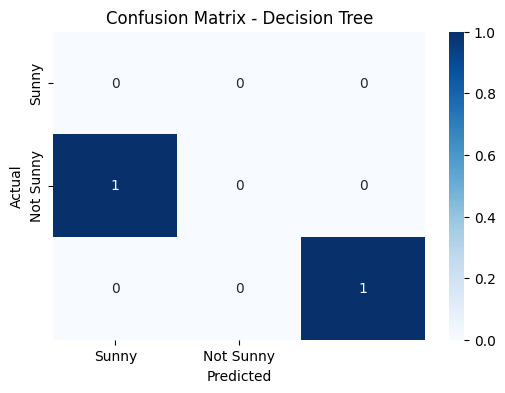

In [82]:
# Jawab disini
# Decision tree

# Menghitung confusion matrix untuk Decision Tree
dt_cm = confusion_matrix(y_test, dt_predictions)

# Plot confusion matrix untuk Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[positive_class, negative_class], yticklabels=[positive_class, negative_class])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

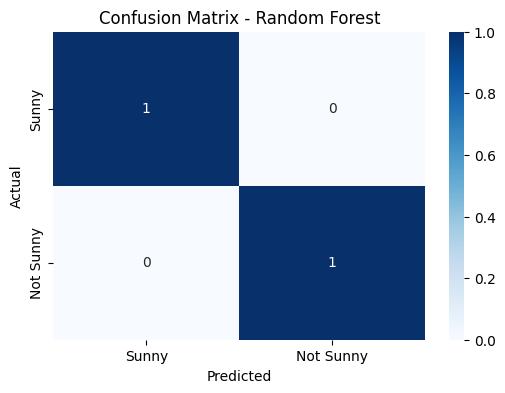

In [83]:
# Jawab disini
# Random forest

# Menghitung confusion matrix untuk Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix untuk Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[positive_class, negative_class], yticklabels=[positive_class, negative_class])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **5.f Hitunglah secara manual untuk metrik metrik seperti accuracy, F1 score, recall score, precision score berikan juga cara anda mendapatkan dan berikan juga formulanya untuk kedua model yang baru saja dibuat (Anggap Sunny sebagai case positif) (Sertakan sumber anda)**  

**Jawab Disini**

#### **Penjelasan Cara Menghitung Metrik**

1. **Accuracy** dihitung dengan membagi jumlah prediksi yang benar (True Positives dan True Negatives) dengan total keseluruhan prediksi.
2. **Precision** diukur dengan membandingkan jumlah prediksi positif yang benar (True Positives) terhadap semua prediksi positif (True Positives + False Positives).
3. **Recall** adalah persentase dari kasus positif yang berhasil ditemukan oleh model, dihitung dengan membandingkan True Positives terhadap jumlah total positif sebenarnya (True Positives + False Negatives).
4. **F1 Score** adalah rata-rata harmonik antara precision dan recall, memberikan keseimbangan antara keduanya.

#### **Langkah Menghitung Berdasarkan Confusion Matrix**

##### **Confusion Matrix untuk Decision Tree**:
|             | Prediksi Sunny | Prediksi Not Sunny |
|-------------|----------------|--------------------|
| **Aktual Sunny**    | 1              | 0                  |
| **Aktual Not Sunny** | 0              | 1                  |

- **True Positives (TP)**: 1
- **True Negatives (TN)**: 1
- **False Positives (FP)**: 0
- **False Negatives (FN)**: 0

##### **Confusion Matrix untuk Random Forest**:
|             | Prediksi Sunny | Prediksi Not Sunny |
|-------------|----------------|--------------------|
| **Aktual Sunny**    | 1              | 0                  |
| **Aktual Not Sunny** | 0              | 1                  |

- **True Positives (TP)**: 1
- **True Negatives (TN)**: 1
- **False Positives (FP)**: 0
- **False Negatives (FN)**: 0

#### **Hasil Perhitungan**

##### **1. Decision Tree:**
- **Accuracy**: (1 + 1) / (1 + 1 + 0 + 0) = 100%
- **Precision**: 1 / (1 + 0) = 100%
- **Recall**: 1 / (1 + 0) = 100%
- **F1 Score**: 2 * (100% * 100%) / (100% + 100%) = 100%

##### **2. Random Forest:**
- **Accuracy**: (1 + 1) / (1 + 1 + 0 + 0) = 100%
- **Precision**: 1 / (1 + 0) = 100%
- **Recall**: 1 / (1 + 0) = 100%
- **F1 Score**: 2 * (100% * 100%) / (100% + 100%) = 100%

#### **Kesimpulan:**
Untuk kedua model (**Decision Tree** dan **Random Forest**), semua metrik (accuracy, precision, recall, F1 score) memiliki nilai **100%** karena tidak ada kesalahan dalam prediksi (semua prediksi benar).


### **5.g Mengapa rumus yang digunakan untuk menghitung metrik pada multi-class classification dengan binary berbeda? dan berikan contoh metrik yang rumusnya sama dalam multi-class classification dan binary. (Sertakan sumber anda)**

**Jawab Disini**
### **Penjelasan Perbedaan Rumus pada Multi-class dan Binary Classification**

Pada **binary classification**, hanya ada dua kelas (positif dan negatif), sehingga metrik seperti precision, recall, dan F1 score dihitung berdasarkan dua kategori ini. Model hanya perlu memprediksi apakah sebuah sampel termasuk dalam satu dari dua kelas, sehingga perhitungannya sederhana.

Namun, pada **multi-class classification**, ada lebih dari dua kelas. Metrik seperti precision, recall, dan F1 score perlu diperhitungkan untuk setiap kelas secara individual. Ada beberapa pendekatan yang dapat digunakan untuk menghitung metrik dalam multi-class, seperti **macro averaging**, **micro averaging**, atau **weighted averaging**, yang menghitung metrik secara agregat untuk semua kelas.

#### **Contoh Perbedaan:**

1. **Binary Classification**:
   - Precision menghitung seberapa akurat prediksi positif dari dua kelas (positif dan negatif).
   - Recall menghitung seberapa banyak kelas positif yang berhasil ditemukan dari dua kelas.

2. **Multi-class Classification**:
   - Precision, recall, dan F1 score dihitung untuk setiap kelas, lalu dirata-rata (contoh dengan **macro averaging**: setiap kelas mendapat bobot yang sama dalam perhitungan).

#### **Contoh Metrik yang Sama pada Multi-class dan Binary:**

Salah satu metrik yang rumusnya sama untuk **multi-class** dan **binary classification** adalah **accuracy**. Accuracy mengukur persentase prediksi yang benar, baik itu dalam konteks multi-class atau binary, dan rumusnya tetap sama: jumlah prediksi yang benar dibagi dengan total prediksi.

#### **Sumber Referensi:**
- [Scikit-learn: Classification Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

### **5.h Terdapat dua averaging yang dapat digunakan pada metrik-metrik multi-class yaitu macro dan micro, apakah perbedaan dari averaging tersebut? dan averaging apa yang sebaiknya digunakan jika terdapat label imbalance? lalu jelaskan apa label imbalance. (Sertakan sumber anda)**

**Jawab Disini**
### **Perbedaan Macro dan Micro Averaging, Penggunaan Saat Label Imbalance, dan Penjelasan Label Imbalance**

#### **Perbedaan Macro dan Micro Averaging:**

1. **Macro Averaging**:
   - Dalam **macro averaging**, metrik (precision, recall, F1 score) dihitung secara terpisah untuk setiap kelas, lalu hasil dari setiap kelas dirata-rata tanpa mempertimbangkan proporsi kelas.
   - **Kelebihan**: Setiap kelas memiliki bobot yang sama dalam perhitungan, cocok jika kita ingin melihat performa keseluruhan dari semua kelas secara seimbang.
   - **Kekurangan**: Kurang cocok jika terdapat ketidakseimbangan antara kelas-kelas, karena setiap kelas diperlakukan sama meskipun jumlah datanya sangat berbeda.

2. **Micro Averaging**:
   - Dalam **micro averaging**, metrik dihitung dengan cara menggabungkan semua True Positives (TP), False Positives (FP), dan False Negatives (FN) dari semua kelas, lalu metrik dihitung berdasarkan jumlah total tersebut.
   - **Kelebihan**: Memperhitungkan kontribusi dari setiap sampel, cocok untuk kasus dengan **label imbalance**.
   - **Kekurangan**: Kelas dengan lebih banyak sampel akan mendominasi perhitungan, sehingga kurang memperlihatkan performa pada kelas yang lebih jarang.

#### **Averaging yang Digunakan Saat Terdapat Label Imbalance**:
Jika terdapat **label imbalance** (ketidakseimbangan dalam jumlah data untuk masing-masing kelas), sebaiknya digunakan **micro averaging**. Ini karena micro averaging menghitung metrik secara keseluruhan dengan mempertimbangkan proporsi data setiap kelas, sehingga hasil perhitungan lebih mencerminkan performa model yang sesungguhnya.

#### **Penjelasan Label Imbalance**:
**Label imbalance** terjadi ketika jumlah sampel di setiap kelas tidak seimbang. Misalnya, dalam sebuah dataset yang digunakan untuk mengklasifikasikan penyakit, mungkin terdapat banyak sampel kelas **sehat** tetapi sangat sedikit sampel kelas **sakit**. Kondisi ini dapat menyebabkan model cenderung memprediksi kelas yang lebih dominan dengan akurasi tinggi, namun memiliki performa yang buruk pada kelas minoritas.

#### **Sumber Referensi**:
- [Scikit-learn: Classification Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)


## No.6

### **6.a Terdapat dua alasan mengapa decision tree tidak dapat mendapatkan leaf node yang sempurna (Contohnya di node tersebut masih terdapat data yang positif dan negatif), jika ada lebih dari 2 alasan tidak masalah. (Sertakan sumber anda)**

**Jawab Disini**
### **Alasan Mengapa Decision Tree Tidak Dapat Mendapatkan Leaf Node yang Sempurna**

1. **Data Tidak Sepenuhnya Terpisah**:
   - Salah satu alasan utama decision tree tidak bisa mendapatkan leaf node yang sempurna adalah karena beberapa fitur atau variabel dalam dataset tidak bisa sepenuhnya memisahkan kelas secara tegas. Ini berarti pada beberapa node, masih terdapat data positif dan negatif karena ada tumpang tindih pada atribut tertentu. Fitur-fitur ini mungkin tidak memberikan cukup informasi untuk memisahkan semua kelas dengan sempurna.

2. **Overfitting dan Batasan Regularisasi**:
   - Untuk menghindari **overfitting**, decision tree sering kali dilengkapi dengan mekanisme **pruning** atau batasan seperti **max depth**, **min samples split**, atau **min samples leaf**. Batasan ini bisa menghentikan tree dari tumbuh terlalu dalam, yang berarti tidak semua node akan benar-benar sempurna (hanya berisi satu kelas). Hal ini penting agar model bisa melakukan generalisasi dengan baik dan tidak hanya "menghafal" data latihan.

3. **Noisy Data**:
   - Noisy data atau data yang mengandung kesalahan atau outlier juga menjadi alasan mengapa decision tree tidak bisa mendapatkan leaf node yang sempurna. Noise dapat menyebabkan tree membentuk split yang kurang ideal, dan meskipun leaf nodes dioptimalkan, beberapa data yang salah label atau outlier tetap akan ada di node yang salah.

#### **Sumber Referensi**:
- [Scikit-learn: Decision Tree Classifier Documentation](https://scikit-learn.org/stable/modules/tree.html)


### **6.b Decision tree merupakan salah satu algoritma yang sangat sensitif dengan perubahan data, mengapa demikian? dan bagaimana random forest dapat menyelesaikan masalah tersebut? (Sertakan sumber anda)**

**Jawab Disini**
### **Mengapa Decision Tree Sangat Sensitif dengan Perubahan Data dan Bagaimana Random Forest Menyelesaikan Masalah Ini**

#### **Mengapa Decision Tree Sangat Sensitif dengan Perubahan Data**:
1. **Overfitting Terhadap Data Latihan**:
   - Decision tree cenderung membentuk struktur yang sangat dalam untuk memisahkan data latihan secara sempurna, yang sering menyebabkan **overfitting**. Sedikit perubahan dalam data (misalnya penambahan, penghapusan, atau perubahan kecil dalam data) dapat menyebabkan decision tree membuat split yang sangat berbeda, mengakibatkan perubahan besar dalam struktur tree dan prediksi yang dihasilkan.

2. **Pemilihan Fitur**:
   - Decision tree membuat keputusan berdasarkan fitur yang dipilih untuk membuat split. Jika ada data yang sedikit berubah, fitur yang terpilih untuk membuat split bisa berubah drastis, yang pada akhirnya mengubah keseluruhan struktur pohon. Hal ini membuat decision tree sangat sensitif terhadap variasi atau gangguan kecil dalam data.

#### **Bagaimana Random Forest Mengatasi Masalah Ini**:
1. **Averaging dan Voting**:
   - Random forest mengurangi sensitivitas decision tree dengan cara membangun banyak decision tree dari subset data yang berbeda (dengan **bootstrap sampling**) dan melakukan **voting** atau **averaging** untuk menghasilkan prediksi akhir. Karena model menggabungkan hasil dari banyak pohon yang berbeda, perubahan kecil dalam satu pohon tidak akan mempengaruhi hasil secara keseluruhan.

2. **Pengacakan Fitur (Random Feature Selection)**:
   - Selain itu, random forest juga menggunakan teknik **random feature selection** di mana pada setiap split, hanya subset acak dari fitur yang dipertimbangkan untuk pemisahan. Hal ini membuat model lebih tahan terhadap fluktuasi dalam data, karena pemilihan fitur tidak sepenuhnya bergantung pada fitur paling dominan yang dipilih oleh decision tree tunggal.

#### **Kesimpulan**:
Random forest mengatasi kelemahan decision tree dengan cara membangun banyak pohon dari subset data yang berbeda dan melakukan pengacakan fitur, sehingga model menjadi lebih stabil dan tidak terlalu sensitif terhadap perubahan kecil dalam data.

#### **Sumber Referensi**:
- [Scikit-learn: Random Forest Documentation](https://scikit-learn.org/stable/modules/ensemble.html#forest)


## No. 7

In [84]:
# KODE INI JANGAN DIUBAH
df_r = pd.read_csv("Admission_Predict_Ver1.1.csv")
df_r
# KODE INI JANGAN DIUBAH

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


### **7.a Split dataset diatas, train dengan menggunakan random forest dan decision tree, dan tampilkan metrik regresinya berdasarkan dataset testing. Berikut merupakan ketentuannya :**

Split
*   data target : Chance of Admit
*   random state : 2025
*   rate split dengan training : 60/40

Decision Tree
*   max_depth = 5
*   random_state = 2025

Random Forest :      
*   max_depth = 5
*   n_estimators = 150
*   random_state = 2025

In [85]:
# Kode split anda disini
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
# Baca dataset
df_r = pd.read_csv("Admission_Predict_Ver1.1.csv")

X = df_r.drop(columns=['Chance of Admit '])  # Semua kolom kecuali 'Chance of Admit' adalah fitur
y = df_r['Chance of Admit ']  # Kolom 'Chance of Admit' adalah target

# Membagi dataset menjadi 60% training dan 40% testing dengan random_state 2025
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2025)

In [86]:
# Train decision tree disini
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=2025)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=2025)

In [87]:
# Train random forest disini
rf_regressor = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=2025)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=150, random_state=2025)

In [88]:
# Tampilkan metrik regresi decision tree disini
dt_predictions = dt_regressor.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_predictions)

print("Decision Tree Regression Metrics:")
print(f"MAE: {dt_mae}")
print(f"MSE: {dt_mse}")
print(f"RMSE: {dt_rmse}")
print(f"R2 Score: {dt_r2}")

Decision Tree Regression Metrics:
MAE: 0.0499969786209018
MSE: 0.004693744533435264
RMSE: 0.06851090813465593
R2 Score: 0.7683794011050313


In [89]:
# Tampilkan metrik regresi random forest disini
rf_predictions = rf_regressor.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Regression Metrics:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R2 Score: {rf_r2}")


Random Forest Regression Metrics:
MAE: 0.04397659838564835
MSE: 0.0035763588254655813
RMSE: 0.05980266570534779
R2 Score: 0.8235186497439424


### **7.b Berdasarkan regression metrics yang ada, jelaskan arti dari setiap metrik tersebut, kegunaan masing-masing metrik, serta rumus-rumus yang digunakan untuk menghitungnya. Setelah itu, analisis dan jelaskan mengapa Root Mean Square Error (RMSE) lebih sering digunakan dibandingkan Mean Square Error (MSE) dalam evaluasi model regresi. Sertakan sumber referensi yang mendukung penjelasan Anda.**


**Jawab Disini**
### **Penjelasan dan Analisis Metrik Regresi**

#### **1. Mean Absolute Error (MAE)**
MAE mengukur rata-rata perbedaan absolut antara nilai yang diprediksi dan nilai sebenarnya. Ini menunjukkan seberapa besar kesalahan prediksi rata-rata.
- **Kegunaan**, MAE berguna saat kita ingin mengetahui seberapa jauh rata-rata prediksi model dari nilai yang sebenarnya, tanpa memperhitungkan arah kesalahan.
- **Rumus**: Rata-rata dari |prediksi - nilai sebenarnya|.

#### **2. Mean Squared Error (MSE)**
MSE menghitung rata-rata dari kuadrat perbedaan antara nilai prediksi dan nilai sebenarnya. MSE memberikan penalti yang lebih besar untuk kesalahan prediksi yang besar.
- **Kegunaan**, MSE lebih sensitif terhadap outlier karena menghitung kuadrat kesalahan. Bagus untuk menghukum prediksi yang jauh dari target.
- **Rumus**: Rata-rata dari (prediksi - nilai sebenarnya)².

#### **3. Root Mean Square Error (RMSE)**
RMSE adalah akar kuadrat dari MSE. Ini mengubah MSE kembali ke skala asli data, sehingga lebih mudah dipahami dibandingkan dengan MSE.
- **Kegunaan**, RMSE sering digunakan karena menghasilkan nilai dalam skala yang sama dengan target aslinya, sehingga lebih intuitif untuk interpretasi.
- **Rumus**: Akar dari MSE.

#### **4. R-Squared (R²)**
R² adalah metrik yang menunjukkan seberapa baik model menjelaskan variasi dalam data. Nilai R² berkisar dari 0 hingga 1, di mana 1 menunjukkan model yang sempurna.
- **Kegunaan**, R² berguna untuk mengukur seberapa baik model menjelaskan variansi data target.
- **Rumus**: 1 - (variansi yang dijelaskan oleh model / total variansi).

---

#### **Mengapa RMSE Lebih Sering Digunakan Dibandingkan MSE?**
- **Alasan**: RMSE lebih sering digunakan karena hasilnya lebih mudah diinterpretasikan, mengingat RMSE berada dalam skala yang sama dengan target data (unit aslinya). Sementara MSE memberikan nilai dalam kuadrat unit, yang sering kali sulit untuk diinterpretasikan secara langsung. Dengan kata lain, RMSE mengembalikan kesalahan ke dalam skala aslinya, sehingga lebih intuitif dan praktis saat mengevaluasi model.

#### **Sumber Referensi**:
- [Scikit-learn: Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)
- [Towards Data Science: Comparing Robustness of MAE, MSE and RMSE](https://towardsdatascience.com/comparing-robustness-of-mae-mse-and-rmse-6d69da870828)


# Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi CART dan sebagai sarana untuk berlatih, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 4 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Classification Case](https://www.kaggle.com/competitions/klasifikasi-lab-4-classification-cart)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 4 ini, kalian **diwajibkan** untuk mengikuti kedua kompetisi kaggle di atas.
